['qVec', 'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'samples0', 'samples1', 'samples2', 'samples3', 'samples4', 'samples5', 'samples6', 'samples7']
Timing :  28090337159358
Actual Charge :  3241
<class 'numpy.ndarray'>
(24,)
<TArrayS [13300, 13301, 13304, ..., 13299, 13301, 13303] at 0x77f2609aa740>
Calculated Charge :  -1.0648000000000002e-06
Sum :  -26518.0


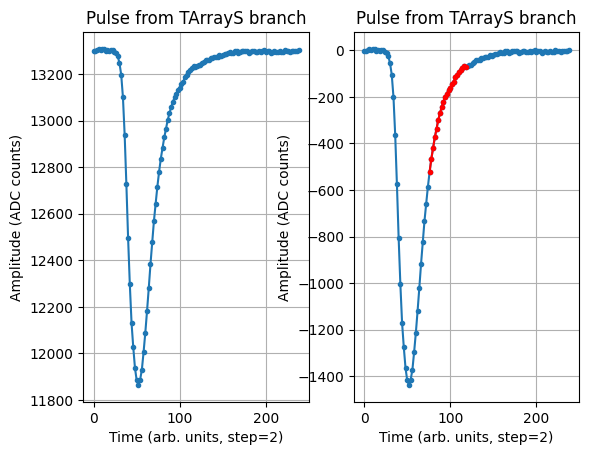

In [3]:
%run wavee.py

['qVec', 'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'samples0', 'samples1', 'samples2', 'samples3', 'samples4', 'samples5', 'samples6', 'samples7']
Fitted parameters: [ 3.5         3.          0.76541989  0.36301311 45.79328267]
2267.785894206549
2994.9420654911837
Mean of Ratio 13:  1.0097941826433567
['qVec', 'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'samples0', 'samples1', 'samples2', 'samples3', 'samples4', 'samples5', 'samples6', 'samples7']
Fitted parameters: [  3.5          3.           0.85633174   0.30972246 106.01145411]
1795.5019108280255
2193.2585987261145
Mean of Ratio 13:  0.9391933310732311
['qVec', 'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 't0', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 'samples0', 'samples1', 'samples2', 'samples3', 'samples4', 'samples5', 'samples6', 'samples7']
Fitted parameters: [  6.0999006  -25.65770822   0.91955544   0.25492859 160.748

/tmp/ipykernel_87460/165708796.py:88: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cov = curve_fit(crystalball, bin_centers, counts, p0=p0)
/tmp/ipykernel_87460/165708796.py:26: RuntimeWarning: overflow encountered in scalar power
  A = (n / abs(alpha))**n * np.exp(-0.5 * alpha**2)
/tmp/ipykernel_87460/165708796.py:28: RuntimeWarning: invalid value encountered in power
  result[~mask] = N * A * (B - z[~mask])**(-n)
/tmp/ipykernel_87460/165708796.py:26: RuntimeWarning: invalid value encountered in scalar power
  A = (n / abs(alpha))**n * np.exp(-0.5 * alpha**2)
/tmp/ipykernel_87460/165708796.py:28: RuntimeWarning: invalid value encountered in multiply
  result[~mask] = N * A * (B - z[~mask])**(-n)
/tmp/ipykernel_87460/165708796.py:28: RuntimeWarning: overflow encountered in scalar multiply
  result[~mask] = N * A * (B - z[~mask])**(-n)


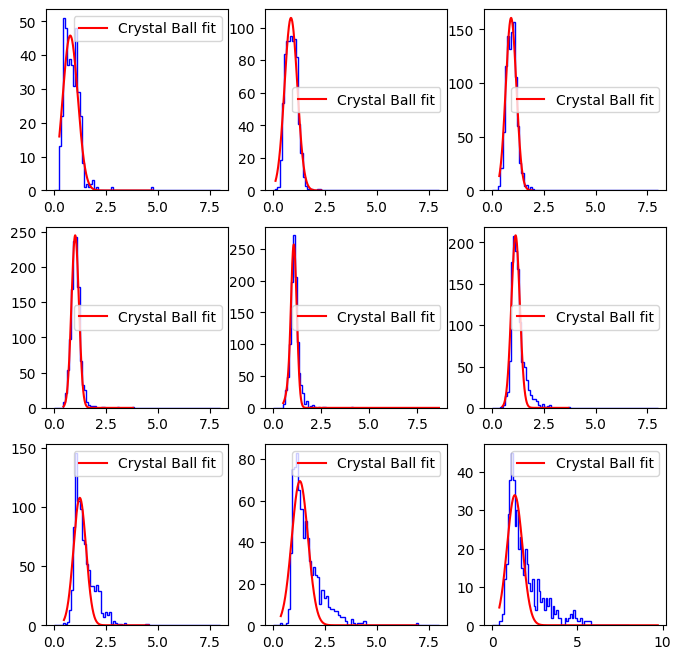

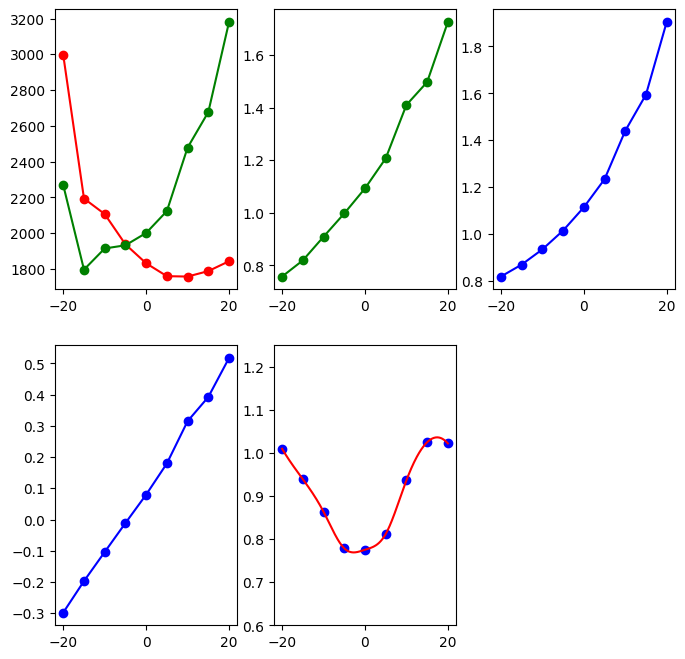

In [16]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
import ROOT

import numpy as np

def crystalball(x, alpha, n, mean, sigma, N):
    # (N = normalization)
    z = (x - mean) / sigma
    if isinstance(z, np.ndarray):
        result = np.zeros_like(z)
    else:
        result = 0

    # Transition point
    mask = z > -alpha

    # Gaussian region
    result[mask] = N * np.exp(-0.5 * z[mask]**2)

    # Power-law tail region
    A = (n / abs(alpha))**n * np.exp(-0.5 * alpha**2)
    B = n / abs(alpha) - abs(alpha)
    result[~mask] = N * A * (B - z[~mask])**(-n)

    return result


base_path="/home/rsehgal/shared/SquareScint/CPP/build/"
#file_list=["Muon_output_0_-20.root","Muon_output_0_-15.root","Muon_output_0_-10.root","Muon_output_0_-5.root","Muon_output_0_0.root","Muon_output_0_5.root","Muon_output_0_10.root","Muon_output_0_15.root","Muon_output_0_20.root"]
#loc_list = [-20,-15,-10,-5,0,5,10,15,20]

#file_list=["Muon_output_20_-20.root","Muon_output_20_-10.root","Muon_output_20_0.root","Muon_output_20_10.root","Muon_output_20_20.root"]
#loc_list = [-20,-10,0,10,20]

file_list=["Muon_output_10_-20.root","Muon_output_10_-15.root","Muon_output_10_-10.root","Muon_output_10_-5.root","Muon_output_10_0.root","Muon_output_10_5.root","Muon_output_10_10.root","Muon_output_10_15.root","Muon_output_10_20.root"]
loc_list = [-20,-15,-10,-5,0,5,10,15,20]

#file_list=["Muon_output_-10_-20.root","Muon_output_-10_-10.root","Muon_output_-10_0.root","Muon_output_-10_10.root","Muon_output_-10_20.root"]
#loc_list = [-20,-10,0,10,20]

mean_list_q0=[]
mean_list_q2=[]
ratio=[]
ratio_log=[]
mean_ratio_1_3=[]

plt.figure(figsize=(8,8))
counter = 1

binss=np.linspace(0,8,80)

for filename in file_list:

    file = uproot.open(base_path+filename)
    
    # check the tree
    tree = file["treeML"]
    
    print(tree.keys())
    ratio_list=[]
    ratio_log_list=[]
    ratio_list_1_3=[]
    
    q0 = tree["q0"].array(library="np")
    treeData = tree.arrays(["q0","q1","q2","q3"],library="np")
    #timing0 = tree["t0"].array(library="np")
    mean_list_q0.append(np.mean(treeData["q0"]))
    mean_list_q2.append(np.mean(treeData["q2"]))

    for i in range(len(treeData["q0"])):
        ratio_list.append(treeData["q2"][i]/treeData["q0"][i])
        ratio_log_list.append(math.log(treeData["q2"][i]/treeData["q0"][i]))
        ratio_list_1_3.append(treeData["q3"][i]/treeData["q1"][i])

    plt.subplot(3,3,counter)
    counts, bins, _ =plt.hist(ratio_list,bins=binss,histtype='step',color='blue')
    #p0 = [1.5, 3, 1.5, 1.0, 100]  # initial guesses
    #popt, pcov = curve_fit(crystal_ball, binss, ratio_list, p0=p0)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    # Initial guess (alpha, n, mean, sigma, N)
    p0 = [3.5, 3, np.mean(ratio_list), np.std(ratio_list)+0.6, 100]
    # Fit
    params, cov = curve_fit(crystalball, bin_centers, counts, p0=p0)
    # Plot fit
    x_fit = np.linspace(min(ratio_list), max(ratio_list), 500)
    y_fit = crystalball(x_fit, *params)
    
    plt.plot(x_fit, y_fit, 'r-', label="Crystal Ball fit")
    plt.legend()
    #plt.show()

    print("Fitted parameters:", params)
    counter += 1
    
    ratio.append(np.mean(ratio_list))    
    mean_ratio_1_3.append(np.mean(ratio_list_1_3))
    ratio_log.append(np.mean(ratio_log_list))
    
    print(np.mean(treeData["q2"]))
    print(np.mean(treeData["q0"]))
    #print("Ratio of Mean : ",np.mean(treeData["q2"])/np.mean(treeData["q0"]))
    #print("Mean of Ratio : ",np.mean(ratio_list))
    print("Mean of Ratio 13: ",np.mean(ratio_list_1_3))
    #print("Hello : ",len(treeData["q0"]))
    
    print("================================")
plt.figure(figsize=(8,8))
plt.subplot(2,3,1)
plt.plot(loc_list,mean_list_q0,marker="o",color="red")
plt.subplot(2,3,1)
plt.plot(loc_list,mean_list_q2,marker="o",color="green")

ratio_mean_list=[]
for i in range(len(mean_list_q0)):
    ratio_mean_list.append(mean_list_q2[i]/mean_list_q0[i])

x_smooth = np.linspace(min(loc_list), max(loc_list), 300)
# Spline interpolation
spline = make_interp_spline(loc_list, mean_ratio_1_3, k=3)  # k=3 → cubic spline
y_smooth = spline(x_smooth)

plt.subplot(2,3,2)
plt.plot(loc_list,ratio_mean_list,marker="o",color="green")
plt.subplot(2,3,3)
plt.plot(loc_list,ratio,marker="o",color="blue")
plt.subplot(2,3,4)
plt.plot(loc_list,ratio_log,marker="o",color="blue")
plt.subplot(2,3,5)
plt.plot(loc_list,mean_ratio_1_3,"o",color="blue")
plt.plot(x_smooth, y_smooth, "-", color='red',label="Smooth Curve")
plt.ylim(0.6, 1.25)
plt.show()